In [ ]:
!apt-get install poppler-utils tesseract-ocr libmagic-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
The following NEW packages will be installed:
  libmagic-dev poppler-utils
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 291 kB of archives.
After this operation, 1,086 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 291 kB in 1s (358 kB/s)
Selecting previously unselected package libmagic-dev:amd64.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../libmagic-dev_1%3a5.41-3ubuntu0.1_amd64.deb ...
Unpacking libmagic-dev:amd64 (1:5.41-3ubuntu0.1) ...
Selecting previously unselected package poppler-utils.
Preparing to unpack .../poppler-u

In [ ]:
%pip install -Uq "unstructured[all-docs]" pillow lxml pillow
%pip install -Uq chromadb tiktoken
%pip install -Uq langchain langchain-community langchain-openai langchain-groq langchain-qdrant langchain-google-genai
%pip install langchain-huggingface sentence-transformers
%pip install -Uq python_dotenv
%pip install qdrant-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.9/527.9 kB 20.3 MB/s eta 0:00:00
   ━

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda
from unstructured.partition.pdf import partition_pdf
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema.output_parser import StrOutputParser

import os
import base64
import time

In [ ]:
os.environ["OPENAI_API_KEY"] = "sk-..."
os.environ["GEMINI_API_KEY"] = "AI..."
os.environ["LANGCHAIN_TRACING_V2"] = "false"
os.environ["OPENAI_API_BASE"] = "https://openrouter.ai/api/v1"


In [ ]:
from unstructured.partition.pdf import partition_pdf
import time
import base64
from IPython.display import Image, display


output_path = "./content/"
file_path = "01.pdf"
start_time = time.time()  # Capture start time
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
     strategy="hi_res",                    # mandatory to infer tables

    extract_image_block_types=["Image"],   #  extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",          # or 'basic'
    max_characters=10000,                  # defaults to 500
    combine_text_under_n_chars=2000,       # defaults to 0
    new_after_n_chars=6000,
)
end_time = time.time()  # Capture end time

elapsed_time = end_time - start_time
print(f"Partitioning took {elapsed_time:.2f} seconds.")

# Correct the get_images_base64 function
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        # Check if the chunk itself has image_base64
        if hasattr(chunk.metadata, 'image_base64') and chunk.metadata.image_base64:
             images_b64.append(chunk.metadata.image_base64)

        # Also check original elements within the chunk
        if hasattr(chunk.metadata, 'orig_elements') and chunk.metadata.orig_elements:
            for el in chunk.metadata.orig_elements:
                if hasattr(el.metadata, 'image_base64') and el.metadata.image_base64:
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Partitioning took 159.32 seconds.


In [ ]:
from collections import Counter
types = Counter([type(c).__name__ for c in chunks])
print(types)


Counter({'CompositeElement': 7})


In [ ]:
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [ ]:
# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [ ]:
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

In [ ]:
len(images)

11

In [ ]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    image_data = base64.b64decode(base64_code)
    display(Image(data=image_data))


In [ ]:
prompt_text = """
Sie sind ein Assistent, der Texte zusammenfassen und Tabellen in Markdown speichern muss.
Geben Sie eine kurze Zusammenfassung des Textes an.
Speichern Sie Tabellen im Markdown-Format und achten Sie darauf, dass Spalten und Zeilen erhalten bleiben.
Antworten Sie nur mit der Zusammenfassung, ohne weitere Kommentare.
Beginnen Sie Ihre Nachricht nicht mit „Hier ist eine Zusammenfassung“ oder Ähnlichem.

Tabelle oder Textblock: {element}
"""
prompt = ChatPromptTemplate.from_template(prompt_text)


model = ChatOpenAI(
    temperature=0.5,
    model="google/gemma-3n-e4b-it:free",
    base_url="https://openrouter.ai/api/v1",
)

summarize_chain = {
    "element": RunnableLambda(lambda x: x)
} | prompt | model | StrOutputParser()

In [ ]:

def safe_invoke(chain, input_text, retries=5):
    for attempt in range(retries):
        try:
            return chain.invoke(input_text)
        except Exception as e:
            print(f"Error summarizing input. Attempt {attempt + 1}/{retries}. Retrying... Error: {e}")
            time.sleep(2 ** attempt)
    return "Failed to summarize."

text_summaries = [safe_invoke(summarize_chain, text) for text in texts]

# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = [safe_invoke(summarize_chain, html) for html in tables_html]

In [ ]:
table_summaries

[]

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda
from unstructured.partition.pdf import partition_pdf
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema.output_parser import StrOutputParser

import os
import base64
import time

from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
import time

def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

prompt_template = ("""You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval.""")

# Model initialization (Qwen multimodal)
model = ChatOpenAI(
    temperature=0.5,
    model="google/gemma-3n-e4b-it:free",
    base_url="https://openrouter.ai/api/v1",
)

# Function to build LangChain message format
def make_prompt(image_b64: str):
    return [
        HumanMessage(
            content=[
                {"type": "text", "text": prompt_template},
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image_b64}"},
                },
            ]
        )
    ]

# Chain wrapper with proper LangChain message format
def _image_summary(image_b64):
    for _ in range(3):
        try:
            messages = make_prompt(image_b64)
            response = model.invoke(messages)
            return response.content  # Extract the actual content
        except Exception as e:
            print(f"Retrying due to error: {e}")
            time.sleep(1)
    return "Failed to summarize."

import time

image_summaries = []

for idx, img_b64 in enumerate(images, start=1):
    t0 = time.time()
    summary = _image_summary(img_b64)
    image_summaries.append(summary)
    print(f"Item {idx} done ✅ ({time.time() - t0:.2f}s)")

In [ ]:
import time

image_summaries = []

for idx, img_b64 in enumerate(images, start=1):
    t0 = time.time()
    summary = safe_image_summary(img_b64)
    image_summaries.append(summary)
    print(f"Item {idx} done ✅ ({time.time() - t0:.2f}s)")


Item 1 done ✅ (48.72s)
Item 2 done ✅ (53.89s)
Item 3 done ✅ (50.24s)
Item 4 done ✅ (39.80s)
Item 5 done ✅ (27.21s)
Item 6 done ✅ (41.88s)
Item 7 done ✅ (51.41s)
Item 8 done ✅ (25.94s)
Item 9 done ✅ (41.99s)
Item 10 done ✅ (41.62s)
Item 11 done ✅ (43.75s)


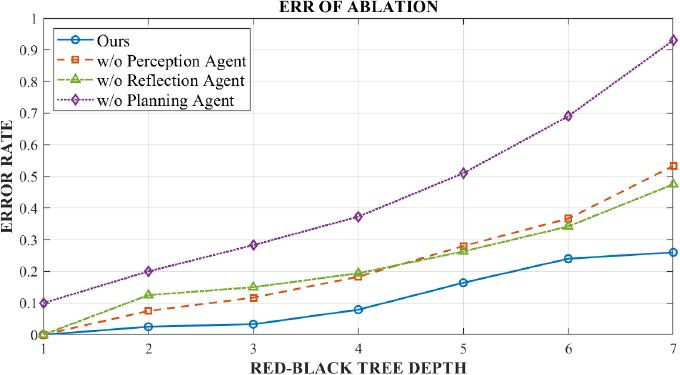

In [ ]:
image_data = base64.b64decode(images[10])
    # Display the image
display(Image(data=image_data))


In [ ]:
image_summaries[0]

'Das Bild zeigt eine schematische Darstellung eines Systems, das die Integration von Multi-Agenten-Systemen, einer Navigationseinheit und einer Benutzeroberfläche in einem kollaborativen Rahmen illustriert. Es handelt sich um eine architektonische Darstellung, die wahrscheinlich in einem Forschungsartikel über die Transformer-Architektur oder ähnliche künstliche Intelligenz-basierte Systeme vorgestellt wird. Hier ist eine detaillierte Beschreibung des Bildes:\n\n### **Übersicht**\nDas Bild ist in mehrere Bereiche unterteilt, die durch Pfeile und Symbole miteinander verbunden sind. Es zeigt einen zentralen Prozess, bei dem ein Benutzer (oben links) mit einem System interagiert, das aus mehreren Komponenten besteht.\n\n---\n\n### **1. Benutzer (oben links)**\n- **Symbol**: Ein lächelnder Avatar oder Cartoon-Gesicht, das einen Benutzer repräsentiert.\n- **Beschreibung**: Der Benutzer ist der Eingangspunkt des Systems. Er interagiert mit dem System, möglicherweise durch Chat oder andere Ei

In [ ]:
du_image_summary = safe_image_summary(images[0])

In [ ]:
du_image_summary

'Das Bild zeigt eine schematische Darstellung eines Systemarchitekturschemas, das einen Multi-Agenten-Framework mit einem Navigation-Roboter verbindet. Der zentrale Knoten "AssistantX" fungiert als Schnittstelle zwischen dem Framework und dem physischen Roboter. Der Framework besteht aus vier Agenten: Perception Agent, Planning Agent, Decision Agent und Reflection Agent. Der Roboter ist mit einer physischen Umsetzung verbunden, die Navigation durchführt. Zusätzlich ist ein Chat-Interface integriert, das möglicherweise für Kommunikation oder Steuerung verwendet wird. Ein Gebäudeplan zeigt die Umgebung, in der der Roboter navigiert.\n\n### Beschreibung der wichtigsten Informationen:\n1. **AssistantX**: Dies ist der zentrale Knoten, der als Schnittstelle zwischen dem Multi-Agenten-Framework und dem Navigation-Roboter dient. Er verfügt über Werkzeuge und eine Benutzeroberfläche, die auf seine Funktion als Assistent hinweisen.\n2. **Multi-Agenten-Framework**: Enthält vier Agenten:\n   - **P

In [ ]:
from qdrant_client import QdrantClient

qdrant_client = QdrantClient(
    url="https://300.aws.cloud.qdrant.io:6333",
    api_key="ey...",
)

print(qdrant_client.get_collections())

collections=[]


In [ ]:
import uuid
from langchain_qdrant import QdrantVectorStore
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever
from qdrant_client import QdrantClient
from qdrant_client.models import Distance, VectorParams
import torch

try:
    qdrant_client = QdrantClient(
        url="https://30.qdrant.io:6333",
        api_key="eyJhbGci",
    )
    # Test connection
    collections = qdrant_client.get_collections()
    print("connection successful")
except Exception as e:
    print(f"connection failed: {e}")
    raise

collection_name = "test3"

try:
    embeddings = HuggingFaceEmbeddings(
        model_name="BAAI/bge-small-en-v1.5",
        model_kwargs={'device': device},
        encode_kwargs={'normalize_embeddings': True}
    )
    # Verify embedding works
    test_embedding = embeddings.embed_query("test")
    print(f"✅ Embeddings loaded, dimension: {len(test_embedding)}")
except Exception as e:
    print(f"initialization failed: {e}")
    raise


#create collection
try:
    qdrant_client.create_collection(
        collection_name=collection_name,
        vectors_config=VectorParams(
            size=768,
            distance=Distance.COSINE,
        ),
    )
    print(f"Created collection: {collection_name}")
except Exception as e:
    if "already exists" in str(e).lower():
        print(f"Collection {collection_name} already exists")
    else:
        print(f"Collection creation failed: {e}")
        raise

# Rest of your code...
vectorstore = QdrantVectorStore(
    client=qdrant_client,
    collection_name=collection_name,
    embedding=embeddings,
)

store = InMemoryStore()
id_key = "doc_id"

retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

print("MultiVectorRetriever setup complete")

In [ ]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

In [ ]:
# Retrieve
docs = retriever.invoke(
    "who are the authors of the paper?"
)

In [ ]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

In [ ]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode

def parse_docs(docs):
    """Separate base64-encoded images and texts based on metadata or type."""
    b64 = []
    text = []
    for doc in docs:
        if isinstance(doc, str):
             try:
                 b64decode(doc)
                 b64.append(doc)
             except Exception:
                 text.append(doc)
        elif hasattr(doc, 'page_content'):
             text.append(doc.page_content)
        else:

             print(f"Skipping unexpected document type: {type(doc)}")

    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        context_text = "\n".join(docs_by_type["texts"])

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": compression_retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")
    | StrOutputParser()
)

chain_with_sources = {
    "context": compression_retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o-mini")
        | StrOutputParser()
    )
)

In [ ]:
response = chain.invoke(
    "What is the attention mechanism?"
)

print(response)

In [ ]:
response = chain_with_sources.invoke(
    "What is multihead?"
)

print("Response:", response['response'])

print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*50 + "\n")
for image in response['context']['images']:
    display_base64_image(image)